#### Sales Prediction for Big Mart Outlets

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.

Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly. 



Data Dictionary
We have train (8523) and test (5681) data set, train data set has both input and output variable(s). You need to predict the sales for test data set.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# import train-test split 
from sklearn.model_selection import train_test_split

# import 'stats'
from scipy import stats

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_squared_error

# import functions to perform feature selection
#from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE

# import function to perform linear regression
from sklearn.linear_model import LinearRegression
import statsmodels.api as sma

# import functions to perform cross validation
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

#Plotting Parameters
plt.rcParams['figure.figsize'] = [15,8]

In [2]:
# import dataset
test=pd.read_csv("Bigsale test.csv")
train=pd.read_csv("Bigsale train.csv")

In [3]:
train.shape,test.shape

((8523, 12), (5681, 11))

In [4]:
# univarient analysis
# bivarient analysis
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

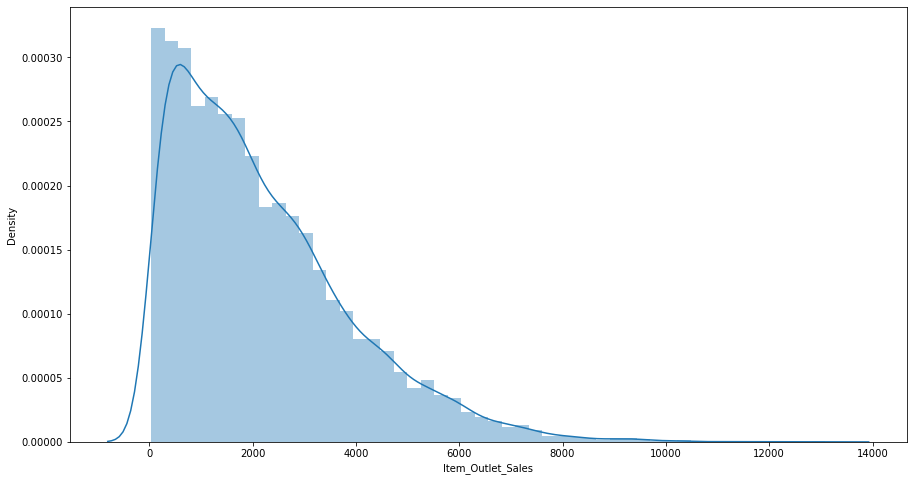

In [5]:
# Target Variable
sns.distplot(train.Item_Outlet_Sales)

In [6]:
train.Item_Outlet_Sales.describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

### First Submission - Base model

In [7]:
train.Item_Outlet_Sales.mean()

2181.2889135750365

In [8]:
# Submission File
solution = pd.DataFrame({"Item_Identifier":test.Item_Identifier, 
                         "Outlet_Identifier":test.Outlet_Identifier,
                         "Item_Outlet_Sales":train.Item_Outlet_Sales.mean()})


In [9]:
solution.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,2181.288914
1,FDW14,OUT017,2181.288914
2,NCN55,OUT010,2181.288914
3,FDQ58,OUT017,2181.288914
4,FDY38,OUT027,2181.288914


In [10]:
# Export to CSV
solution.to_csv("BaseModel.csv",index=False)

### Your score for this submission is : 1773.8251377790564.

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

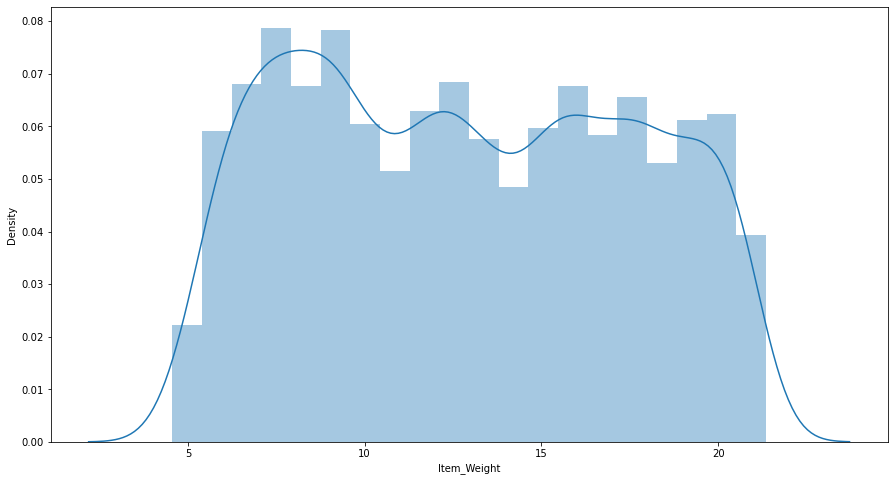

In [11]:
# Item Weight
sns.distplot(train.Item_Weight.dropna())

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

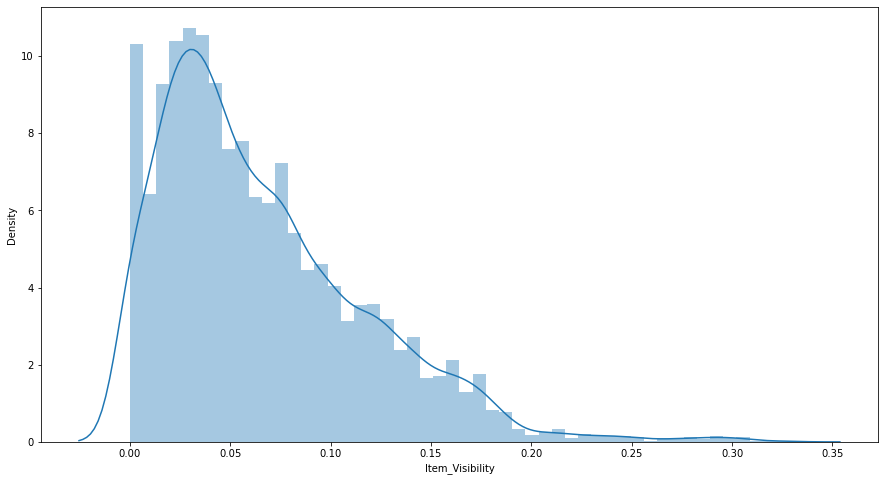

In [12]:
sns.distplot(train.Item_Visibility)

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

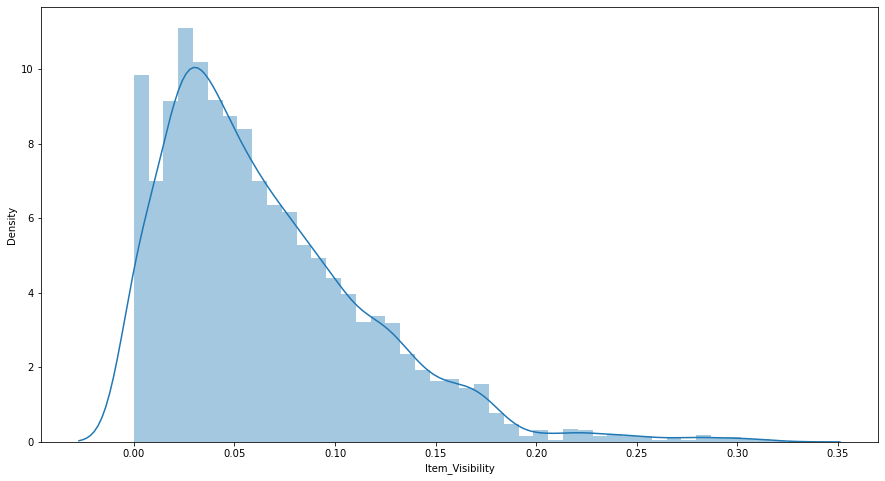

In [13]:
sns.distplot(test.Item_Visibility)

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

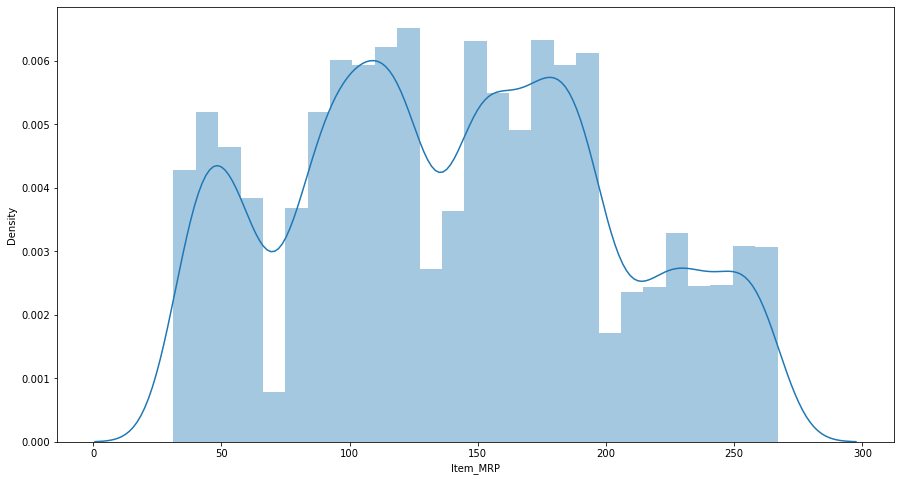

In [14]:
sns.distplot(train.Item_MRP)

Inference - Item mrp has different data distribution. We will use Bivariant analysis to understand further

In [15]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [16]:
# Single category - sns.countplot | Value counts and then plotting the frequency
train.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [17]:
# The item fat content
train.Item_Fat_Content.replace(to_replace=["reg","LF","low fat"],
                              value=["Regular","Low Fat","Low Fat"],inplace=True)
test.Item_Fat_Content.replace(to_replace=["reg","LF","low fat"],
                              value=["Regular","Low Fat","Low Fat"],inplace=True)

<AxesSubplot:>

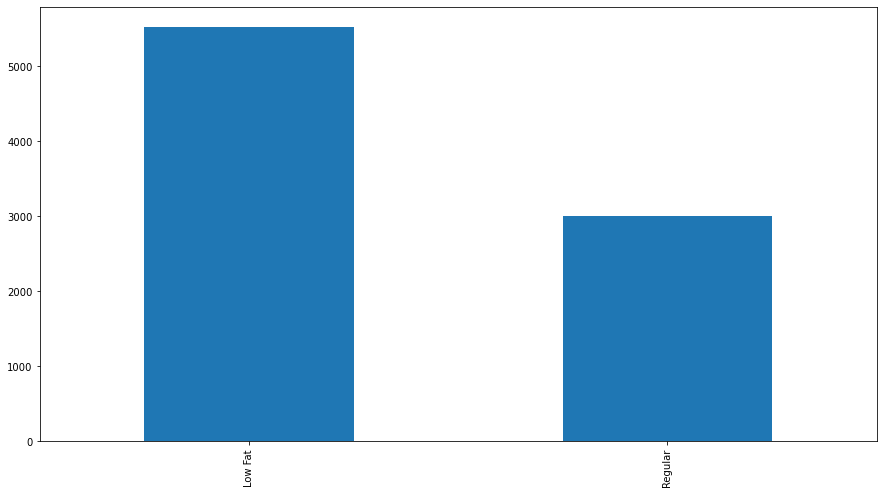

In [18]:
train.Item_Fat_Content.value_counts().plot(kind='bar')

<AxesSubplot:>

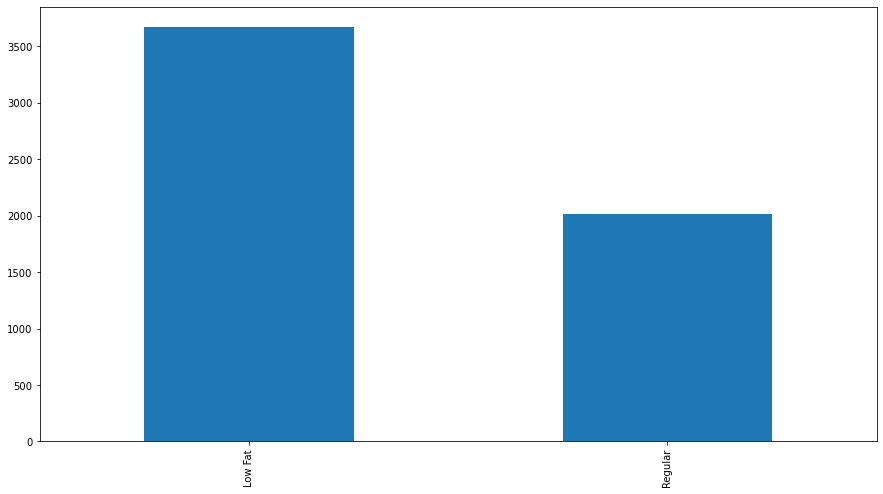

In [19]:
test.Item_Fat_Content.value_counts().plot(kind='bar')

<AxesSubplot:>

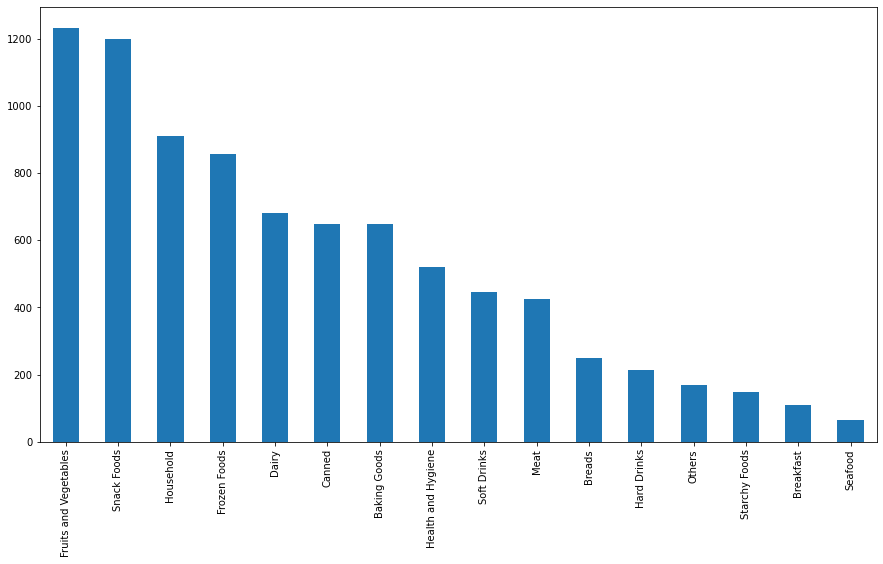

In [20]:
train.Item_Type.value_counts().plot(kind='bar')

In [21]:
train.Outlet_Identifier.value_counts()
# Out027 has the highest frequency - sale will also be higher  for this outlet


OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

<AxesSubplot:>

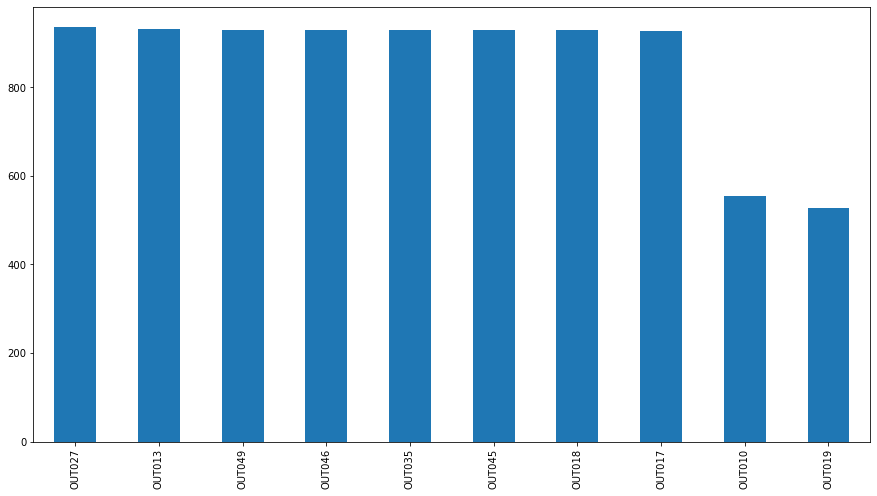

In [22]:
train.Outlet_Identifier.value_counts().plot(kind='bar')

<AxesSubplot:>

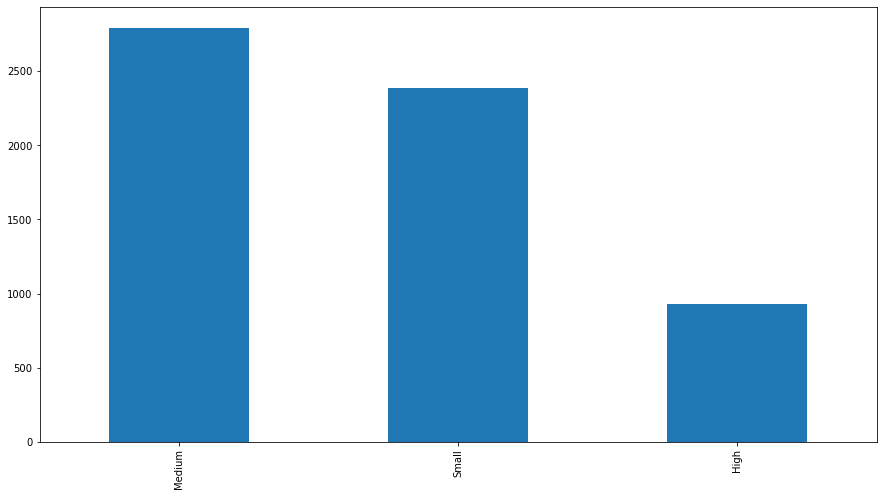

In [23]:
train.Outlet_Size.value_counts().plot(kind='bar')
#Out027 is the medium outlet

### Summary of Univariate Analysis

* Mean Sales is 2100 dollars and the min and max are 33 and 13000 resp.
* Product Types - Low Fat and Regular
* Top 3 Selling Items - **Fruits and Veggies, Snack Foods and Household Items**
* The Outlet readily available is **Out027**
* Most of the Outlets are **Medium** sized outlet.
* **Tier 3** Location has the highest no of Outlets.
* **S1** is the most seen Outlet Type


# Bivariate analysis

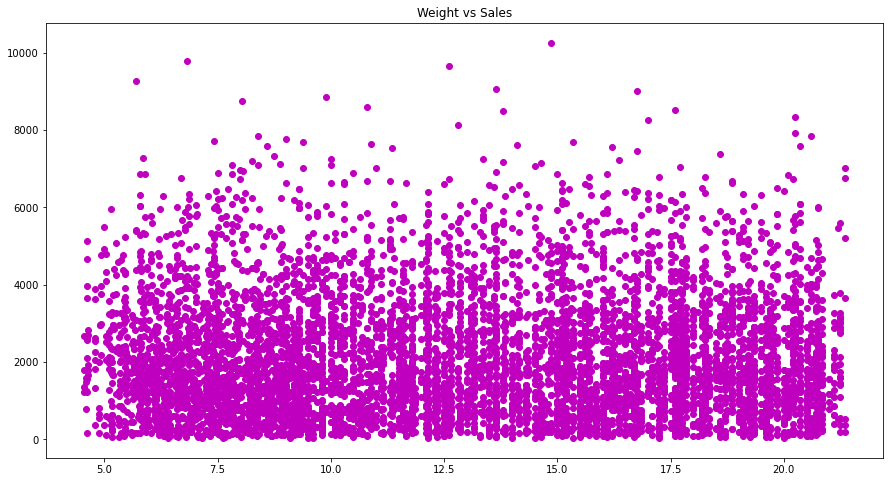

In [24]:
# Item Weight vs sales 
plt.scatter(train.Item_Weight,train.Item_Outlet_Sales,c='m')
plt.title("Weight vs Sales")
plt.show()

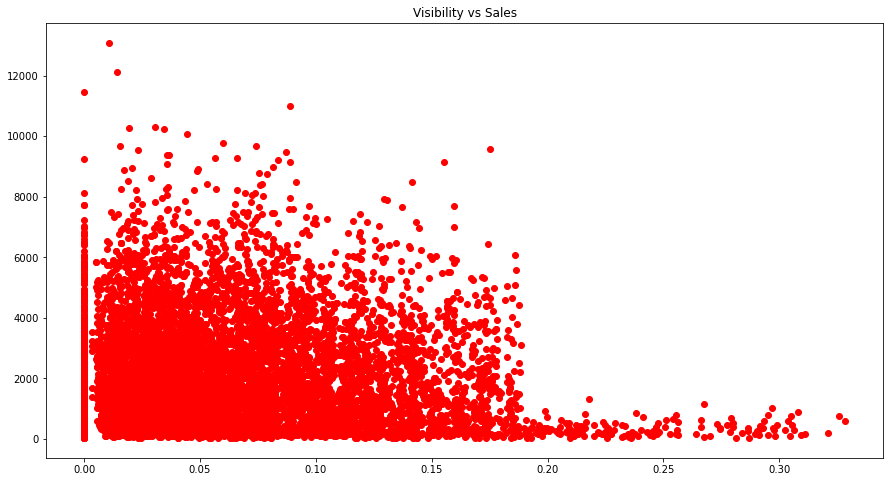

In [25]:
# Item Weight vs sales 
plt.scatter(train.Item_Visibility,train.Item_Outlet_Sales,c='r')
plt.title("Visibility vs Sales")
plt.show()
# Inference - Bigger the product,lesser the sales
# A straight line on 0 needs to be fixing 

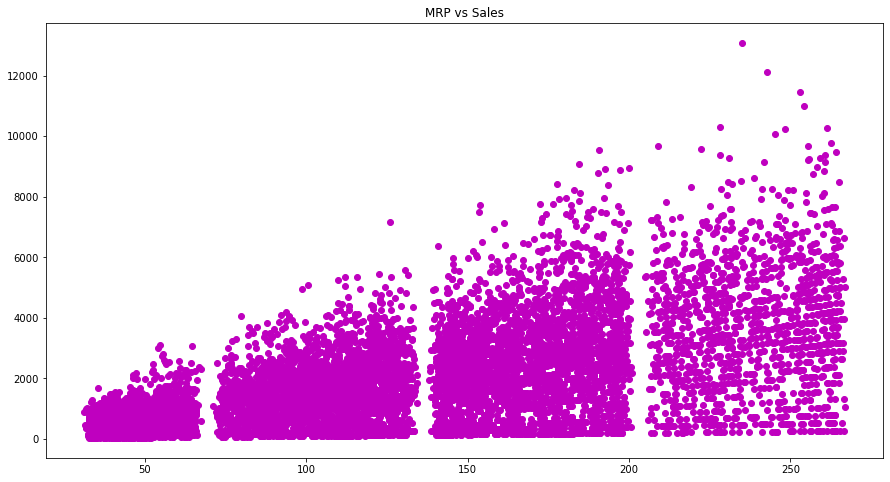

In [26]:
# Item Weight vs sales 
plt.scatter(train.Item_MRP,train.Item_Outlet_Sales,c='m')
plt.title("MRP vs Sales")
plt.show()

In [27]:
# Cat Vs Num
# Boxplot

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

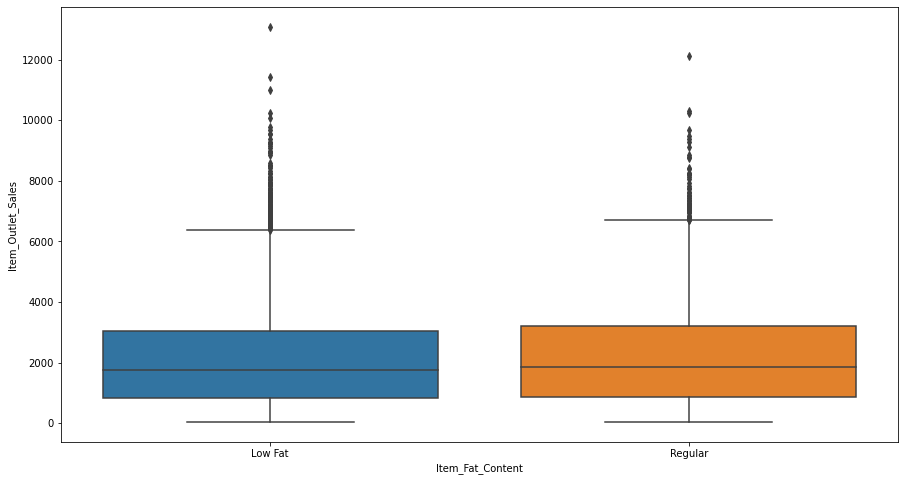

In [28]:
sns.boxplot(train.Item_Fat_Content,train.Item_Outlet_Sales)

In [29]:
# statistical summary of above boxplot
train.groupby('Item_Fat_Content')['Item_Outlet_Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
Item_Fat_Content,,,,,,,,
Low Fat,5517.0,2157.711534,1697.973824,33.2900,826.2578,1765.0358,3050.69560,13086.9648
Regular,3006.0,2224.561170,1721.480865,33.9558,857.5504,1844.5989,3198.66965,12117.5600


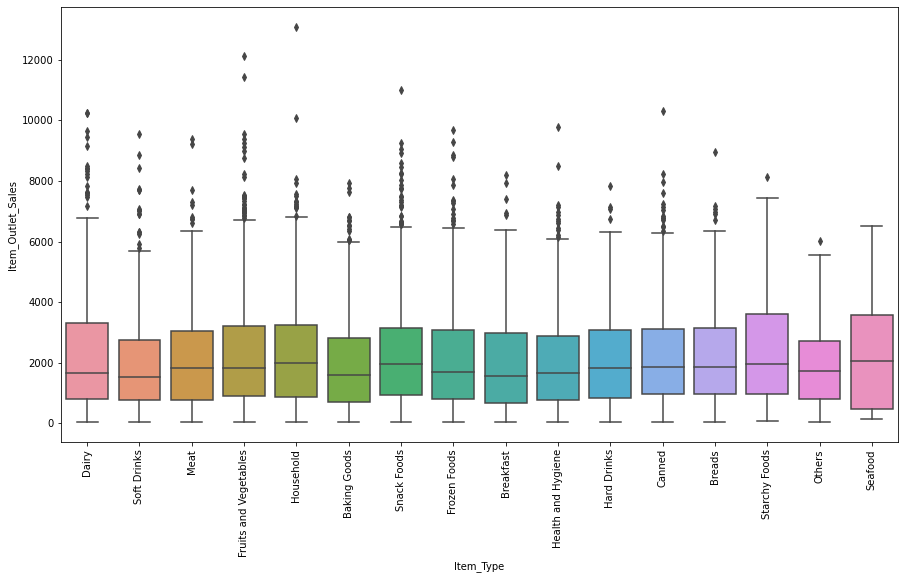

In [30]:
sns.boxplot(train.Item_Type,train.Item_Outlet_Sales)
plt.xticks(rotation=90)
plt.show()
# inf - Fast moving products - Fruits and Veggies 

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='Item_Outlet_Sales'>

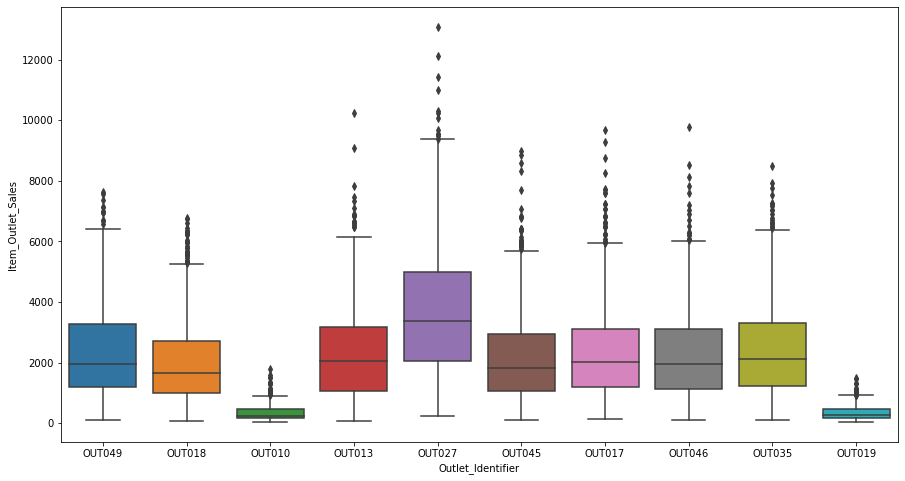

In [31]:
sns.boxplot(train.Outlet_Identifier,train.Item_Outlet_Sales)
# Out27 & Out13 has higeshest sale and Out10 & Out 19 has lowest sales

<AxesSubplot:xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

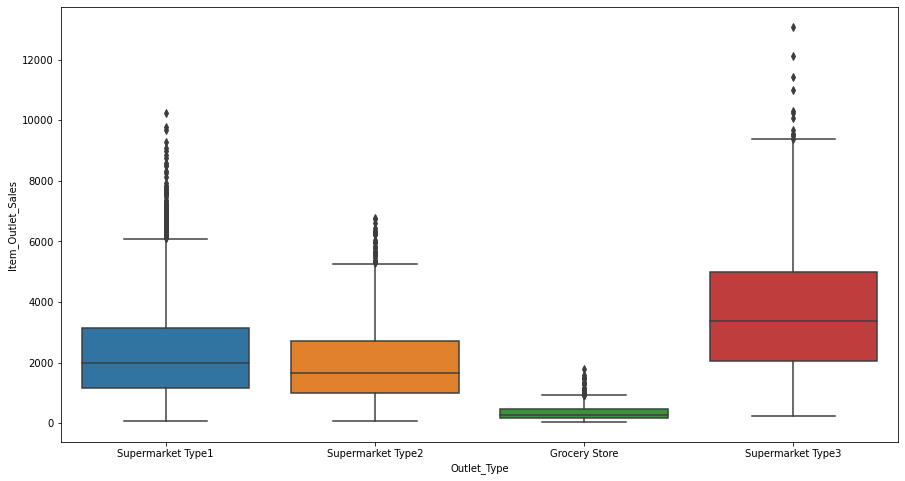

In [32]:
sns.boxplot(train.Outlet_Type,train.Item_Outlet_Sales)
# s3 is followed by s1 in sales

### Summary of Bivariate Analysis
Low Fat Items sell more than Regular
No pattern was found between weight and TGT
We saw interesting pattern between visibility & TGT
We also saw that there is a straight line at 0 in visibility plot which needs fixing.
OUT027 & Out013 earns the biggest revenue generator label & Out10 and Out 19 are the slow movers
S1 and S3 makes lot of money for the business.
Fast Moving Products are Fruits & Veggies, Snacks, Soft Drinks, Households...


## Missing values

In [33]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [34]:
test.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [35]:
combined=pd.concat([train,test],ignore_index=True)

In [36]:
combined.isna().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [37]:
# Lambda
combined["Item_Weight"]=combined.groupby("Item_Identifier")["Item_Weight"].transform(lambda x:x.fillna(x.mean()))

In [38]:
combined.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [39]:
combined.Outlet_Size.value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [40]:
combined.loc[combined.Outlet_Type=="Grocery Store", "Outlet_Size"] = "Small"
combined.loc[combined.Outlet_Type=="Supermarket Type1", "Outlet_Size"] = "Small"


### Feature Engineering

In [41]:
combined.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Small,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Small,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,Small,Tier 3,Supermarket Type1,994.7052


In [42]:
# Deal with 0s in Visibility
combined["Item_Visibility"]=combined.groupby("Item_Identifier")["Item_Visibility"].transform(lambda x:x.replace(0, x.mean()))


In [43]:
combined.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [44]:
Perishable=['Dairy', 'Meat', 'Fruits and Vegetables','Breakfast', 'Canned','Breads', 'Starchy Foods', 'Seafood']

In [45]:
# Function To convert it
def perish(x):
    if(x in Perishable):
        return("Perishables")
    else:
        return("Non_Perishables")


In [46]:
combined['Itemtype_Cat'] = combined.Item_Type.apply(perish)

In [47]:
# Outlet Vintage
combined["Vintage"] = 2013 - combined.Outlet_Establishment_Year


In [48]:
# Outlet_ID

def outlets(x):
    if(x =="OUT027"):
        return("OUT027")
    else:
        return("Others")
    
combined["Outlets"] = combined["Outlet_Identifier"].apply(outlets)


In [49]:
# Pattern from ItemID
mylist = []
for i in combined.Item_Identifier:
    mylist.append(i[:2])
    
combined["ItemID_Cat"] = pd.Series(mylist)


In [50]:
# Dropping Variables
df=combined.drop(['Item_Type','Outlet_Establishment_Year','Outlet_Identifier','Item_Identifier'
],axis=1)

In [51]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Itemtype_Cat,Vintage,Outlets,ItemID_Cat
0,9.30,Low Fat,0.016047,249.8092,Small,Tier 1,Supermarket Type1,3735.1380,Perishables,14,Others,FD
1,5.92,Regular,0.019278,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,Non_Perishables,4,Others,DR
2,17.50,Low Fat,0.016760,141.6180,Small,Tier 1,Supermarket Type1,2097.2700,Perishables,14,Others,FD
3,19.20,Regular,0.017834,182.0950,Small,Tier 3,Grocery Store,732.3800,Perishables,15,Others,FD
4,8.93,Low Fat,0.009780,53.8614,Small,Tier 3,Supermarket Type1,994.7052,Non_Perishables,26,Others,NC


In [52]:
# Changing Item Fat Content as per the ItemID
df.loc[df.ItemID_Cat=="NC", "Item_Fat_Content"]="Non Edible"


In [53]:
trn=df[:8523]
tst=df[8523:]

In [54]:
tst.reset_index(drop=True)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Itemtype_Cat,Vintage,Outlets,ItemID_Cat
0,20.750,Low Fat,0.007565,107.8622,Small,Tier 1,Supermarket Type1,NaN,Non_Perishables,14,Others,FD
1,8.300,Regular,0.038428,87.3198,Small,Tier 2,Supermarket Type1,NaN,Perishables,6,Others,FD
2,14.600,Non Edible,0.099575,241.7538,Small,Tier 3,Grocery Store,NaN,Non_Perishables,15,Others,NC
3,7.315,Low Fat,0.015388,155.0340,Small,Tier 2,Supermarket Type1,NaN,Non_Perishables,6,Others,FD
4,13.600,Regular,0.118599,234.2300,Medium,Tier 3,Supermarket Type3,NaN,Perishables,28,OUT027,FD
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,10.500,Regular,0.013496,141.3154,Small,Tier 1,Supermarket Type1,NaN,Non_Perishables,16,Others,FD
5677,7.600,Regular,0.142991,169.1448,Medium,Tier 3,Supermarket Type2,NaN,Perishables,4,Others,FD
5678,10.000,Non Edible,0.073529,118.7440,Small,Tier 2,Supermarket Type1,NaN,Non_Perishables,11,Others,NC
5679,15.300,Regular,0.088380,214.6218,Small,Tier 2,Supermarket Type1,NaN,Perishables,6,Others,FD


In [55]:
tst.drop('Item_Outlet_Sales',axis=1)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Itemtype_Cat,Vintage,Outlets,ItemID_Cat
8523,20.750,Low Fat,0.007565,107.8622,Small,Tier 1,Supermarket Type1,Non_Perishables,14,Others,FD
8524,8.300,Regular,0.038428,87.3198,Small,Tier 2,Supermarket Type1,Perishables,6,Others,FD
8525,14.600,Non Edible,0.099575,241.7538,Small,Tier 3,Grocery Store,Non_Perishables,15,Others,NC
8526,7.315,Low Fat,0.015388,155.0340,Small,Tier 2,Supermarket Type1,Non_Perishables,6,Others,FD
8527,13.600,Regular,0.118599,234.2300,Medium,Tier 3,Supermarket Type3,Perishables,28,OUT027,FD
...,...,...,...,...,...,...,...,...,...,...,...
14199,10.500,Regular,0.013496,141.3154,Small,Tier 1,Supermarket Type1,Non_Perishables,16,Others,FD
14200,7.600,Regular,0.142991,169.1448,Medium,Tier 3,Supermarket Type2,Perishables,4,Others,FD
14201,10.000,Non Edible,0.073529,118.7440,Small,Tier 2,Supermarket Type1,Non_Perishables,11,Others,NC
14202,15.300,Regular,0.088380,214.6218,Small,Tier 2,Supermarket Type1,Perishables,6,Others,FD


In [56]:
trn.shape,tst.shape

((8523, 12), (5681, 12))

# Model Building

In [57]:
# dummies
dummytrain = pd.get_dummies(trn,drop_first=True)
dummytest = pd.get_dummies(tst,drop_first=True)


In [58]:
pd.get_dummies(train).shape

(8523, 1602)

In [59]:
dummytrain.shape,dummytest.shape

((8523, 17), (5681, 17))

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
lr=LinearRegression()
ridge = Ridge(alpha = 0.5, normalize=True)
lasso = Lasso(alpha=0.5, normalize=True)
# Define x and y
X = dummytrain.drop("Item_Outlet_Sales", axis = 1)
y = dummytrain.Item_Outlet_Sales
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.20, random_state = 1)

# Define Function that will return RMSE

def rmse(y_test,pred):
    RMSE=np.sqrt(mean_squared_error(ytest,pred))
    print("RMSE",np.round(RMSE,4))
    
pred_lr = lr.fit(xtrain, ytrain).predict(xtest)
rmse(ytest, pred_lr)


RMSE 1142.927


### Lasso Regression

Train RMSE:  1143.9305606256696
Test RMSE:  1067.9620819103834


<AxesSubplot:>

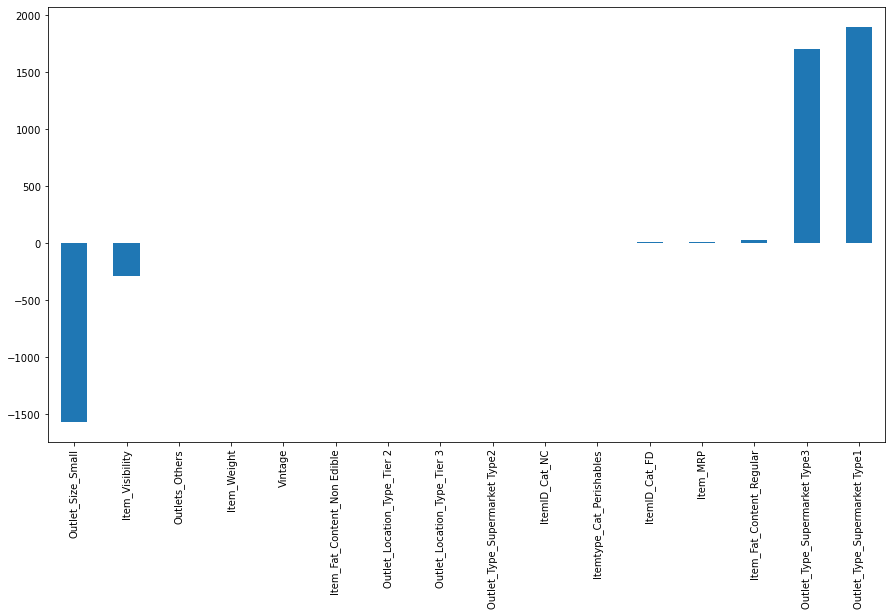

In [62]:
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV

# Predictor and Target
X = dummytrain.drop("Item_Outlet_Sales", axis = 1)
y = dummytrain.Item_Outlet_Sales

# Simple Model to see the effect on Train RMSE vs Test RMSE

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.20, random_state = 42)

lasso = Lasso(alpha = 0.1, normalize=True)
pred_train = lasso.fit(xtrain, ytrain).predict(xtrain)
pred_test = lasso.fit(xtrain, ytrain).predict(xtest)

print("Train RMSE: ", np.sqrt(mean_squared_error(ytrain, pred_train)))
print("Test RMSE: ", np.sqrt(mean_squared_error(ytest, pred_test)))
#Plot the Coefficients

pd.Series(lasso.coef_, xtrain.columns).sort_values().plot(kind = "bar")

# As we decrease Alpha Value, coefficents are not restricted and most of the var are still 0


In [63]:
# Function that tells me which predictors are 0s basis alpha values

def lassos(alphas):
    # create a dataframe
    df = pd.DataFrame()
    
    #Names of the Columns/Predictors
    df["Features"] = xtrain.columns
    
    # Loop for all alphas
    for i in alphas:
        lasso = Lasso(alpha=i)
        lasso.fit(xtrain,ytrain)
        col_name = "Alpha = %f" % alpha
        df[col_name] = lasso.coef_
        return(df)
